# Notebook : Comparing the classic BKT with cheated BKT structure

In [1]:
import sys

sys.path.append("/Users/olivier/PycharmProjects/bayesian-kst/")
from kgraph.expert_layer.domain_graph import DomainGraph
from kgraph.expert_layer.knowledge_components import KnowledgeComponent
from kgraph.expert_layer.links import LinkModel, LinkFromParents
from kgraph.resources_layer.exercise_family import ExerciseFamily
from kgraph.resources_layer.exercise import Exercise
from kgraph.learner_layer.evaluation import Evaluation
from kgraph.learner_layer.learner_pool import LearnerPool

import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.dynamicBN as gdyn

## 1. DomainGraph with only one KC and a given Evaluation
### A. Classic BKT
#### a. Setup

In [2]:
# Exercise associated to KC A
ex_1 = Exercise(1, "qcm", "", params={'slip':.1, 'guess':.25})
ex_2 = Exercise(2, "qcm", "", params={'slip':.1, 'guess':.25})
ex_3 = Exercise(3, "qcm", "", params={'slip':.1, 'guess':.25})

ex_fam_a = ExerciseFamily(1, "Ex A", exercise_list=[ex_1, ex_2, ex_3])

# KC A
kc_a = KnowledgeComponent(1, "A", ex_fam_a)

# Empty LinkModel
link_model = LinkModel([])

# Domain graph with only one KC: KC A
one_kc_domain_graph = DomainGraph([kc_a], link_model)

In [3]:
answers = {"ex_1": {'success': True}, "ex_2": {'success': False}, "ex_3": {'success': True}}
eval_kc_a = Evaluation(evaluation_id=1, exercise_family=ex_fam_a, learner=None, answers=answers)

In [4]:
bkt_net = gum.BayesNet('BKT')
learn = 0.1
evs = {}
for i in range(len(answers.keys())):
    guess, slip = .25, .1
    bkt_net.add(gum.LabelizedVariable(f"KCA_{i}", '', 2))
    bkt_net.add(gum.LabelizedVariable(f"EXA_{i}", '', 2))
    bkt_net.addArc(*(f"KCA_{i}", f"EXA_{i}"))
    bkt_net.cpt(f"EXA_{i}")[{f"KCA_{i}": False}] = [1-guess, guess]
    bkt_net.cpt(f"EXA_{i}")[{f"KCA_{i}": True}] = [slip, 1-slip]
    evs[f"EXA_{i}"] = int(answers[f"ex_{i+1}"]["success"])
    if i != 0:
        bkt_net.addArc(*(f"KCA_{i-1}", f"KCA_{i}"))
        bkt_net.cpt(f"KCA_{i}")[{f"KCA_{i-1}": False}] = [1-learn, learn]
        bkt_net.cpt(f"KCA_{i}")[{f"KCA_{i-1}": True}] = [0, 1]
    
bkt_net.cpt(f"KCA_0").fillWith([.5, .5])
print(evs)

{'EXA_0': 1, 'EXA_1': 0, 'EXA_2': 1}


#### b. Results without evidences

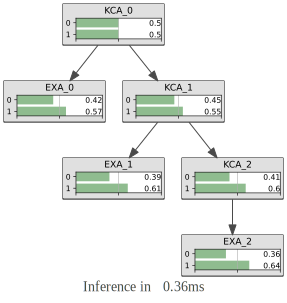

In [5]:
gnb.showInference(bkt_net)

#### b. Results with evidences

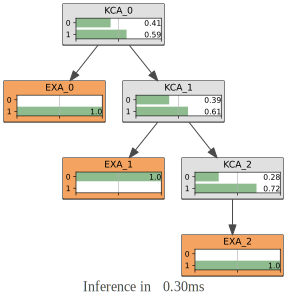

In [6]:
gnb.showInference(bkt_net, evs=evs)

### B. Cheated BKT network 

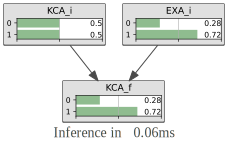

In [7]:
cheated_bkt_net = gum.BayesNet('Cheated BKT')
ex_fam_a_score = 0.72
cheated_bkt_net.add(gum.LabelizedVariable(f"KCA_i", '', 2))
cheated_bkt_net.add(gum.LabelizedVariable(f"KCA_f", '', 2))
cheated_bkt_net.add(gum.LabelizedVariable(f"EXA_i", '', 2))
cheated_bkt_net.addArc(*(f"EXA_i", f"KCA_f"))
cheated_bkt_net.addArc(*(f"KCA_i", f"KCA_f"))

cheated_bkt_net.cpt(f"KCA_f")[{f"EXA_i": False, "KCA_i": False}] = [1, 0]
cheated_bkt_net.cpt(f"KCA_f")[{f"EXA_i": False, "KCA_i": True}] = [1, 0]
cheated_bkt_net.cpt(f"KCA_f")[{f"EXA_i": True, "KCA_i": False}] = [0, 1]
cheated_bkt_net.cpt(f"KCA_f")[{f"EXA_i": True, "KCA_i": True}] = [0, 1]

cheated_bkt_net.cpt(f"KCA_i").fillWith([.5, .5])
cheated_bkt_net.cpt(f"EXA_i").fillWith([1 - ex_fam_a_score, ex_fam_a_score])

gnb.showInference(cheated_bkt_net)

## 2. DomainGraph with two KC and a given Evaluation
### A. Classic BKT
#### a. Setup

In [8]:
ex_fam_b = ExerciseFamily(2, "Ex B", exercise_list=[])
kc_b = KnowledgeComponent(2, "B", ex_fam_b)

kc_a_to_kc_b = LinkFromParents(kc_b, [kc_a])
# Empty LinkModel
link_model = LinkModel([kc_a_to_kc_b])

# Domain graph with only one KC: KC A
two_kc_domain_graph = DomainGraph([kc_a, kc_b], link_model)

In [9]:
answers = {"ex_1": {'success': True}, "ex_2": {'success': False}, "ex_3": {'success': True}}
eval_kc_a = Evaluation(evaluation_id=1, exercise_family=ex_fam_a, learner=None, answers=answers)

In [10]:
bkt_net = gum.BayesNet('BKT')
learn = 0.1
evs = {}
for i in range(len(answers.keys())):
    guess, slip = .25, .1
    bkt_net.add(gum.LabelizedVariable(f"KCA_{i}", '', 2))
    bkt_net.add(gum.LabelizedVariable(f"KCB_{i}", '', 2))
    bkt_net.addArc(*(f"KCA_{i}", f"KCB_{i}"))
    bkt_net.cpt(f"KCB_{i}")[{f"KCA_{i}": False}] = [.99, .01]
    bkt_net.cpt(f"KCB_{i}")[{f"KCA_{i}": True}] = [.5, .5]

    bkt_net.add(gum.LabelizedVariable(f"EXA_{i}", '', 2))
    bkt_net.addArc(*(f"KCA_{i}", f"EXA_{i}"))
    bkt_net.cpt(f"EXA_{i}")[{f"KCA_{i}": False}] = [1-guess, guess]
    bkt_net.cpt(f"EXA_{i}")[{f"KCA_{i}": True}] = [slip, 1-slip]
    evs[f"EXA_{i}"] = int(answers[f"ex_{i+1}"]["success"])
    if i != 0:
        bkt_net.addArc(*(f"KCA_{i-1}", f"KCA_{i}"))
        bkt_net.cpt(f"KCA_{i}")[{f"KCA_{i-1}": False}] = [1-learn, learn]
        bkt_net.cpt(f"KCA_{i}")[{f"KCA_{i-1}": True}] = [0, 1]
    
bkt_net.cpt(f"KCA_0").fillWith([.5, .5])
print(evs)

{'EXA_0': 1, 'EXA_1': 0, 'EXA_2': 1}


#### b. Results without evidences

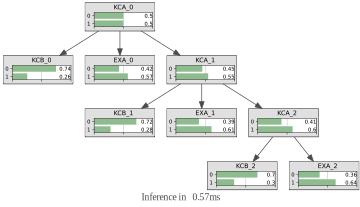

In [11]:
gnb.showInference(bkt_net)

#### b. Results with evidences

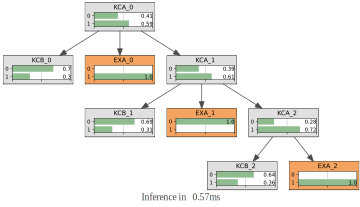

In [12]:
gnb.showInference(bkt_net, evs=evs)

### B. Cheated BKT network V1 

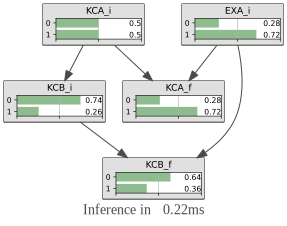

In [13]:
v1_cheated_bkt_net = gum.BayesNet('Cheated BKT')
ex_fam_a_score = 0.72
v1_cheated_bkt_net.add(gum.LabelizedVariable(f"KCA_i", '', 2))
v1_cheated_bkt_net.add(gum.LabelizedVariable(f"KCB_i", '', 2))

v1_cheated_bkt_net.addArc(*(f"KCA_i", f"KCB_i"))
v1_cheated_bkt_net.cpt(f"KCB_i")[{f"KCA_i": False}] = [.99, .01]
v1_cheated_bkt_net.cpt(f"KCB_i")[{f"KCA_i": True}] = [.5, .5]

v1_cheated_bkt_net.add(gum.LabelizedVariable(f"KCA_f", '', 2))
v1_cheated_bkt_net.add(gum.LabelizedVariable(f"KCB_f", '', 2))
v1_cheated_bkt_net.add(gum.LabelizedVariable(f"EXA_i", '', 2))
v1_cheated_bkt_net.addArc(*(f"EXA_i", f"KCA_f"))
v1_cheated_bkt_net.addArc(*(f"KCA_i", f"KCA_f"))
v1_cheated_bkt_net.addArc(*(f"KCB_i", f"KCB_f"))

v1_cheated_bkt_net.cpt(f"KCA_f")[{f"EXA_i": False, "KCA_i": False}] = [1, 0]
v1_cheated_bkt_net.cpt(f"KCA_f")[{f"EXA_i": False, "KCA_i": True}] = [1, 0]
v1_cheated_bkt_net.cpt(f"KCA_f")[{f"EXA_i": True, "KCA_i": False}] = [0, 1]
v1_cheated_bkt_net.cpt(f"KCA_f")[{f"EXA_i": True, "KCA_i": True}] = [0, 1]

v1_cheated_bkt_net.addArc(*(f"EXA_i", f"KCB_f"))
v1_cheated_bkt_net.cpt(f"KCB_f")[{f"EXA_i": False, "KCB_i": False}] = [1, 0]
v1_cheated_bkt_net.cpt(f"KCB_f")[{f"EXA_i": False, "KCB_i": True}] = [.99, .01]
v1_cheated_bkt_net.cpt(f"KCB_f")[{f"EXA_i": True, "KCB_i": False}] = [.5, .5]
v1_cheated_bkt_net.cpt(f"KCB_f")[{f"EXA_i": True, "KCB_i": True}] = [.5, .5]



v1_cheated_bkt_net.cpt(f"KCA_i").fillWith([.5, .5])
v1_cheated_bkt_net.cpt(f"EXA_i").fillWith([1 - ex_fam_a_score, ex_fam_a_score])

gnb.showInference(v1_cheated_bkt_net)

### B. Cheated BKT network V2

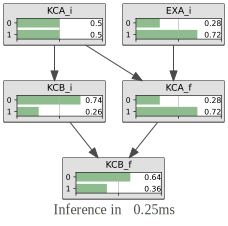

In [14]:
v2_cheated_bkt_net = gum.BayesNet('Cheated BKT')
ex_fam_a_score = 0.72
v2_cheated_bkt_net.add(gum.LabelizedVariable(f"KCA_i", '', 2))
v2_cheated_bkt_net.add(gum.LabelizedVariable(f"KCB_i", '', 2))

v2_cheated_bkt_net.addArc(*(f"KCA_i", f"KCB_i"))
v2_cheated_bkt_net.cpt(f"KCB_i")[{f"KCA_i": False}] = [.99, .01]
v2_cheated_bkt_net.cpt(f"KCB_i")[{f"KCA_i": True}] = [.5, .5]

v2_cheated_bkt_net.add(gum.LabelizedVariable(f"KCA_f", '', 2))
v2_cheated_bkt_net.add(gum.LabelizedVariable(f"KCB_f", '', 2))
v2_cheated_bkt_net.add(gum.LabelizedVariable(f"EXA_i", '', 2))
v2_cheated_bkt_net.addArc(*(f"EXA_i", f"KCA_f"))
v2_cheated_bkt_net.addArc(*(f"KCA_i", f"KCA_f"))
v2_cheated_bkt_net.addArc(*(f"KCB_i", f"KCB_f"))

v2_cheated_bkt_net.cpt(f"KCA_f")[{f"EXA_i": False, "KCA_i": False}] = [1, 0]
v2_cheated_bkt_net.cpt(f"KCA_f")[{f"EXA_i": False, "KCA_i": True}] = [1, 0]
v2_cheated_bkt_net.cpt(f"KCA_f")[{f"EXA_i": True, "KCA_i": False}] = [0, 1]
v2_cheated_bkt_net.cpt(f"KCA_f")[{f"EXA_i": True, "KCA_i": True}] = [0, 1]

v2_cheated_bkt_net.addArc(*(f"KCA_f", f"KCB_f"))
v2_cheated_bkt_net.cpt(f"KCB_f")[{f"KCA_f": False, "KCB_i": False}] = [.99, .01]
v2_cheated_bkt_net.cpt(f"KCB_f")[{f"KCA_f": False, "KCB_i": True}] = [.99, .01]
v2_cheated_bkt_net.cpt(f"KCB_f")[{f"KCA_f": True, "KCB_i": False}] = [.5, .5]
v2_cheated_bkt_net.cpt(f"KCB_f")[{f"KCA_f": True, "KCB_i": True}] = [.5, .5]



v2_cheated_bkt_net.cpt(f"KCA_i").fillWith([.5, .5])
v2_cheated_bkt_net.cpt(f"EXA_i").fillWith([1 - ex_fam_a_score, ex_fam_a_score])

gnb.showInference(v2_cheated_bkt_net)

### B. Cheated BKT network V3

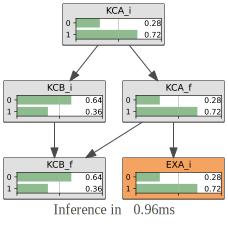

In [18]:
v3_cheated_bkt_net = gum.BayesNet('Cheated BKT')
ex_fam_a_score = 0.72
v3_cheated_bkt_net.add(gum.LabelizedVariable(f"KCA_i", '', 2))
v3_cheated_bkt_net.add(gum.LabelizedVariable(f"KCB_i", '', 2))

v3_cheated_bkt_net.addArc(*(f"KCA_i", f"KCB_i"))
v3_cheated_bkt_net.cpt(f"KCB_i")[{f"KCA_i": False}] = [.99, .01]
v3_cheated_bkt_net.cpt(f"KCB_i")[{f"KCA_i": True}] = [.5, .5]

v3_cheated_bkt_net.add(gum.LabelizedVariable(f"KCA_f", '', 2))
v3_cheated_bkt_net.add(gum.LabelizedVariable(f"KCB_f", '', 2))
v3_cheated_bkt_net.add(gum.LabelizedVariable(f"EXA_i", '', 2))
v3_cheated_bkt_net.addArc(*(f"KCA_f", "EXA_i"))
v3_cheated_bkt_net.addArc(*(f"KCA_i", f"KCA_f"))
v3_cheated_bkt_net.addArc(*(f"KCB_i", f"KCB_f"))

v3_cheated_bkt_net.cpt(f"KCA_f")[{"KCA_i": False}] = [1, 0]
v3_cheated_bkt_net.cpt(f"KCA_f")[{"KCA_i": True}] = [0, 1]

v3_cheated_bkt_net.cpt(f"EXA_i")[{f"KCA_f": False}] = [1, 0]
v3_cheated_bkt_net.cpt(f"EXA_i")[{f"KCA_f": True}] = [0, 1]



v3_cheated_bkt_net.addArc(*(f"KCA_f", f"KCB_f"))
v3_cheated_bkt_net.cpt(f"KCB_f")[{f"KCA_f": False, "KCB_i": False}] = [.99, .01]
v3_cheated_bkt_net.cpt(f"KCB_f")[{f"KCA_f": False, "KCB_i": True}] = [.99, .01]
v3_cheated_bkt_net.cpt(f"KCB_f")[{f"KCA_f": True, "KCB_i": False}] = [.5, .5]
v3_cheated_bkt_net.cpt(f"KCB_f")[{f"KCA_f": True, "KCB_i": True}] = [.5, .5]



v3_cheated_bkt_net.cpt(f"KCA_i").fillWith([.5, .5])

gnb.showInference(v3_cheated_bkt_net, evs={"EXA_i": [1-ex_fam_a_score, ex_fam_a_score]})